# Estadistica Aplicada
## Andrik Daniel Vazquez Regalado - 1905622
### 8va Sesión a 23 deb

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from lifelines.datasets import load_rossi 
rossi = load_rossi()

In [4]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [5]:
from lifelines import ExponentialFitter

In [8]:
ex1 = ExponentialFitter().fit(rossi["week"], rossi["arrest"])

(0.0, 0.05)

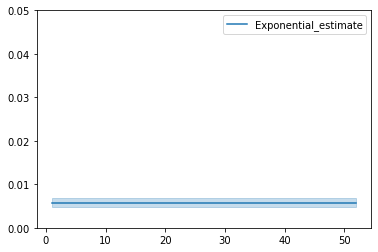

In [10]:
ex1.plot_hazard()
plt.ylim(0,0.05)

In [11]:
ex1.hazard_ #Probabilidad de que te vuelvan arrestar

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755
...,...
51.526682,0.005755
51.645012,0.005755
51.763341,0.005755
51.881671,0.005755


weibull

In [13]:
from lifelines import WeibullFitter

In [14]:
weib1 = WeibullFitter().fit(rossi["week"],rossi["arrest"])

<AxesSubplot:>

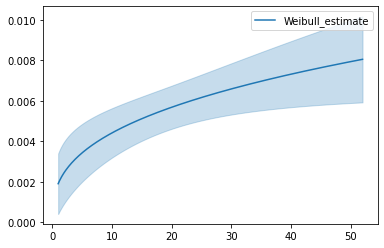

In [16]:
weib1.plot_hazard() #Entre mas semanas pasan el riesgo de que te arresten es mayor/creciente

In [17]:
weib1.hazard_

,Weibull_estimate
1.000000,0.001901
1.118329,0.001980
1.236659,0.002054
1.354988,0.002124
1.473318,0.002190
...,...
51.526682,0.008018
51.645012,0.008024
51.763341,0.008031
51.881671,0.008038


In [19]:
weib1.hazard_at_times(1.0) #El riesgo de que te arresten a la primer semana

1.0    0.001901
Name: Weibull_estimate, dtype: float64

In [21]:
from lifelines import LogNormalFitter #LOG-NORMAL

In [22]:
logn1 = LogNormalFitter().fit(rossi["week"], rossi["arrest"])

<AxesSubplot:>

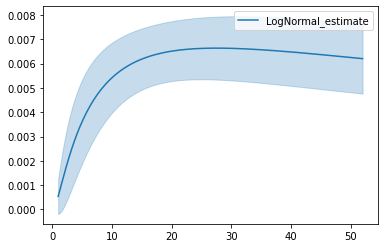

In [23]:
logn1.plot_hazard()

In [24]:
logn1.hazard_

,LogNormal_estimate
1.000000,0.000538
1.118329,0.000642
1.236659,0.000749
1.354988,0.000857
1.473318,0.000965
...,...
51.526682,0.006216
51.645012,0.006214
51.763341,0.006211
51.881671,0.006208


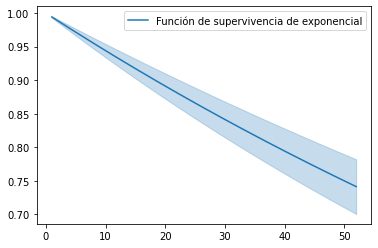

In [25]:
ex1.plot_survival_function(label="Función de supervivencia de exponencial");

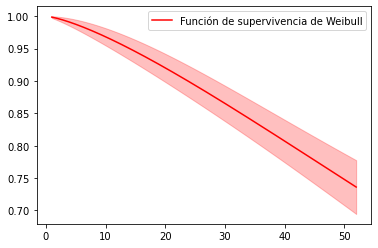

In [34]:
weib1.plot_survival_function(label="Función de supervivencia de Weibull", color="red");

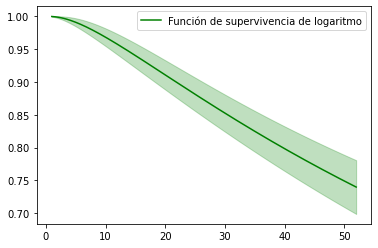

In [36]:
logn1.plot_survival_function(label="Función de supervivencia de logaritmo", color="green");

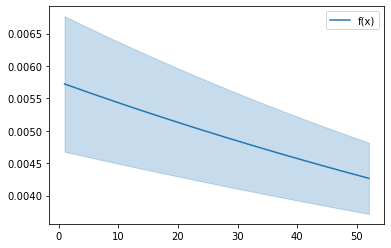

In [27]:
ex1.plot_density(label="f(x)"); #Función de densidad de exponencial

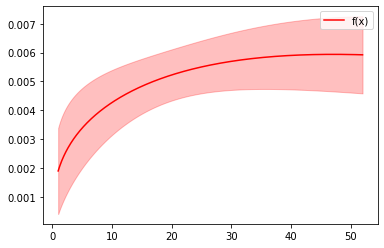

In [35]:
weib1.plot_density(label="f(x)", color="red"); #funcion de densidad de Weibull

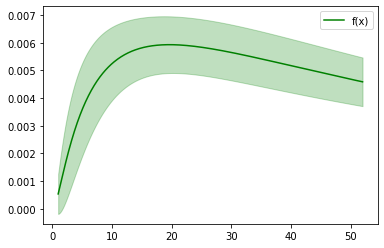

In [37]:
logn1.plot_density(label="f(x)", color="green"); #Función de densidad de logaritmo

In [29]:
ex1.median_survival_time_ #Mediana de exponencial

120.44346091357195

In [30]:
weib1.median_survival_time_ #Mediana de Weibull

94.5561872278691

In [33]:
logn1.median_survival_time_ #Mediana de logaritmo

124.59531642094827

### Para comparar y elegir el "mejor" modelo se suele usar el Criterio de Akaike (AIC)

El criterio de Akaike (AIC) se calcula:

$AIC = -2LogL + 2k $

Donde k es el numero de parametros a estimar.

Se considera que el modelo con el menor valor en el AIC es el mejor modelo.

In [38]:
ex1.AIC_.round(), weib1.AIC_.round(), logn1.AIC_.round()

(1406.0, 1397.0, 1400.0)

### El modelo con el menor criterio de Akaike (AIC) es el Weibull, por tanto podemos concluir que el tiempo de supervivencia (liberado-arrestado) sigue una distribucción Weibull.

### La mediana es de 94, lo cual signifca que el 50% de los individuos ya habian sido arrestado en la semana 94.